### Customer Segmentation: Clustering

<h3> Problem Statement: </h3>
    
Using an analysis of customer satisfaction requirements, behaviours, and problems, businesses can better understand their potential customers. With the help of this data, businesses may tailor their offerings to the particular requirements of certain consumer categories, spending less on marketing by concentrating exclusively on the most likely customers

<h4> Example:</h4>

Let's say a company produces a line of organic skincare products. Through customer personality analysis, they identify that one of their ideal customer segments is environmentally-conscious women between the ages of 25-35 who live in urban areas and are interested in natural and sustainable products.

Instead of advertising their products to their entire customer database, the company can target their marketing efforts specifically towards this segment. They can tailor their messaging to highlight the eco-friendly and natural aspects of their products, and promote their brand through channels that are likely to reach this demographic, such as social media platforms popular among young, environmentally-conscious women.

By focusing their marketing efforts on this specific segment, the company is more likely to attract customers who are genuinely interested in their products and are more likely to make a purchase, which can ultimately lead to increased sales and customer loyalty.

<!-- <h4> Column Variables of our dataset: </h4>

* ID: Customer's unique identifier
* ear_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

<h4>Products</h4>

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

<h4>Promotion</h4>

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

<h4>Place</h4>

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month
 -->

<h3 style="color: green;">Target:</h3>
Need to perform clustering to summarize customer segments.

<h3>Acknowledgement</h3>
The dataset for this project is provided by Dr. Omar Romero-Hernandez.



<h3 style="font-style:italic;"> The project involves clustering customers' data from a groceries firm's database to identify similarities among customers and create segments. This helps optimize the significance of each customer and modify products according to their needs and behaviors</h3>

In [24]:
print("\n")

Importing all the necessary libraries for analysis


In [338]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import sys

<h3> Loading Data </h3>

In [339]:
data=pd.read_csv('marketing_campaign.csv',sep="\t")
print("Number of rows in the dataframe:",len(data))
data.head()

Number of rows in the dataframe: 2240


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

The dataset consists of 2240 datapoints and 29 variables. It can be categorized into the following subsets:
Customer's Information
* ID
* Year_Birth
* Education
* Maritial_Status
* Income
* Kidhome
* Teenhome
* Dt_Customer
* Recency
* Complain

Products - Amount spent on different products in the last 2 years(Mnt=Amount)
* MntWines:Amount spent on wines
* Mnt Fruits: Amount spent on fruits
* MntMeatProducts: Amount spent on meat products
* MntFishProducts: Amount spent on fish products
* MntSweetProducts: Amount spent on sweet products
* MntGoldProds: Amount spent on gold products(e.g. jewelery)

Place
* NumWebPurchases
* NumCatalogPurchases
* NumStorePurchases
* NumWebVisitsMonth

Promotion
* NumDealsPurchase
* AcceptedCmp1
* AcceptedCmp2
* AcceptedCmp3
* AcceptedCmp4
* AcceptedCmp5
* Response




<h3> Data Cleaning </h3

In [340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### From the output above, we can conclude the following:
* Income column has missing values
* Dt_Customer consists of the data a customer joined the database but the data type is not in the correct format. We will need to change it to DateTime format
* There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to encode them into numeric forms later.

<p><i>There are many ways to handle missing data and different approaches are applied based on the dataframe, industry and study. In my project, I will drop the rows that have missing values because each row represents a unique customer and we don't have enough information to predict one's income</i></p>

In [341]:
#removing rows with missing(NA) values

data=data.dropna()
print('The total number of rows after removing rows with missing values are:',len(data))
print("\n")
print('We dropped',2240-2216,'number of rows,which is about',round(((2240-2216)/2240)*100,2),'percent')

The total number of rows after removing rows with missing values are: 2216


We dropped 24 number of rows,which is about 1.07 percent


In [342]:
print("\n")

In the next step, I am going to create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record.

Thus to get the values I must check the newest and oldest recorded dates.

In [343]:
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'])
dates=[]
for i in data['Dt_Customer']:
    i=i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [344]:
print("\n")

Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date

In [345]:
#Creating a column "Customer_For"
days=[]
d1=max(dates) # taking it to be the newest customer
for i in dates:
    delta=d1-i
    days.append(delta)
data['Customer_For']=days
data['Customer_For']=pd.to_numeric(data['Customer_For'],errors='coerce')    


In [346]:
print("\n")

<h3>Now, we will eplore the unique values of the categorical column to get a better understand of the data.</h3>

In [347]:
print('Total categories in the Marital_Status column:\n', data['Marital_Status'].value_counts(),"\n")
print('Total categories in the Education column:\n',data['Education'].value_counts())

Total categories in the Marital_Status column:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the Education column:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [348]:
print("\n")

Steps to engineer new features from some columns:
* Step1: From the Age column, we will extract the Birth Year of the respective customer and calcuate their age.
* Step2: Creating a new column called 'Spent', to calculate the total amount spent by each customer over the span of 2 years
* Step3: Create a new column, called 'Living_With' out of 'Maritial_Status' to extract the living situtation of couples
* Step4: Create a new column, called 'Children', to indicate the total children in a household, that is kids and teenagers
* Step5: To get a better understanding of household size,Create a new column, called 'Family_Size' to count household size
* Step6: Create a new column called, 'Is_Parent',to indicate parenthood status
* Step7: Finally, create 3 categories in the Education column by simplifying value counts

* I will also drop any columns that are redundant to our analysis




<b> Please note: The order of the steps do not matter in this analysis. I labels the steps to make it easier for me to follow </b>

In [349]:
#Step 1
data['Age']=2023-data['Year_Birth']

#Step 2
data['Spent']=data['MntWines'] + data['MntSweetProducts'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntGoldProds']+ data['MntFruits']

#Step 3
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Step 4
data['Children']= data['Kidhome'] + data['Teenhome']

#Step 5
data['Family size']=data['Children'] + data['Living_With'].replace({'Alone':1,'Partner':2})

#Step 6
data['Is_Parent']=np.where(data.Children>0,1,0)

#Step 7
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# Step 8
columns_to_drop=['Marital_Status','Dt_Customer','Z_CostContact','Z_Revenue','Year_Birth','ID']
data=data.drop(columns_to_drop,axis=1)

In [350]:
# To add clarify for the Spent column, I will replaces the abbreviation for clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [351]:
print("\n")

<b>Viewing the dataframe after engineering some columns</b>

In [352]:
data.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0      Graduate  58138.0        0         0       58    635      88   546   
1      Graduate  46344.0        1         1       38     11       1     6   
2      Graduate  71613.0        0         0       26    426      49   127   
3      Graduate  26646.0        1         0       26     11       4    20   
4  Postgraduate  58293.0        1         0       94    173      43   118   

   Fish  Sweets  ...  AcceptedCmp2  Complain  Response       Customer_For  \
0   172      88  ...             0         0         1  83894400000000000   
1     2       1  ...             0         0         0  10800000000000000   
2   111      21  ...             0         0         0  40780800000000000   
3    10       3  ...             0         0         0   5616000000000000   
4    46      27  ...             0         0         0  27734400000000000   

   Age  Spent  Living_With  Children  Family size  Is_Parent  
0   66   1617        Alone         0            1          0  
1   69     27        Alone         2            3          1  
2   58    776      Partner         0            2          0  
3   39     53      Partner         1            3          1  
4   42    422      Partner         1            3          1  

[5 rows x 30 columns]

In [353]:
data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271  4.423735e+16   
std        0.244950      0.115588     0.096907     0.357417  2.008532e+16   
min        0.000000      0.000000     0.000000     0.000000  0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000  2.937600e+16   
50%        0.000000      0.000000     0.000000     0.000000  4.432320e+16   
75%        0.000000      0.000000     0.000000     0.000000  5.927040e+16   
max        1.000000      1.000000     1.000000     1.000000  9.184320e+16   

               Age        Spent     Children  Family size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     54.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      27.000000     5.000000     0.000000     1.000000     0.000000  
25%      46.000000    69.000000     0.000000     2.000000     0.000000  
50%      53.000000   396.500000     1.000000     3.000000     1.000000  
75%      64.000000  1048.000000     1.000000     3.000000     1.000000  
max     130.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

<Figure size 800x550 with 0 Axes>

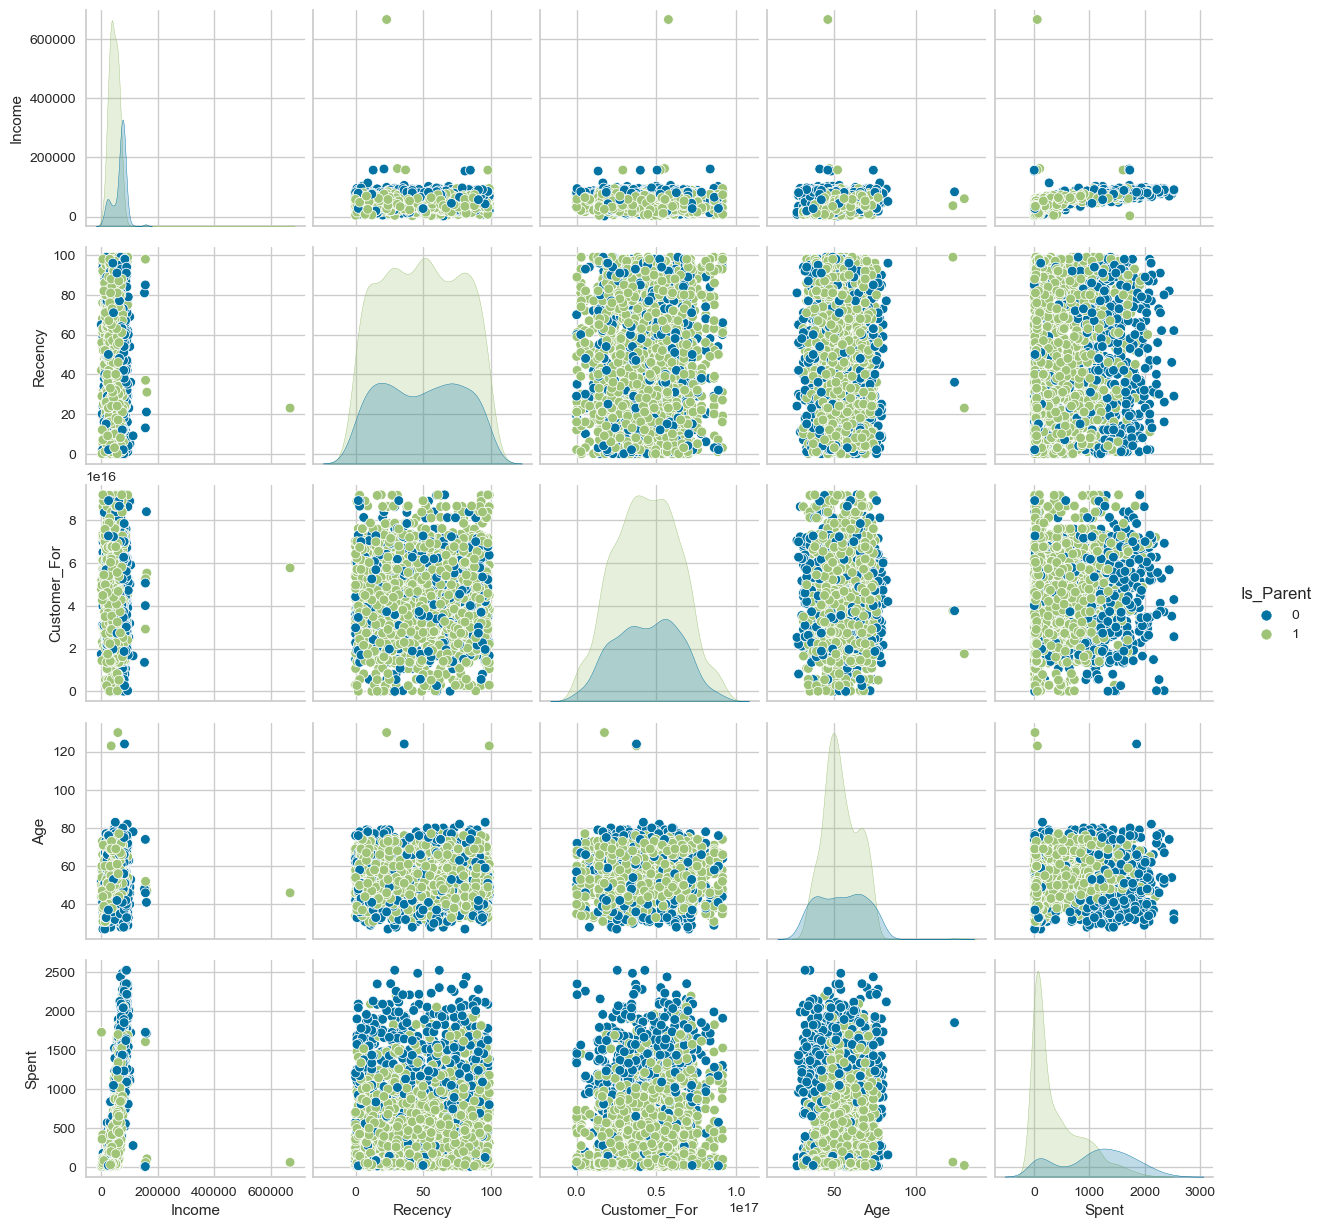

In [354]:
#Ploting a pairplot to view some selected columns
to_plot=['Income','Recency','Customer_For','Age','Spent','Is_Parent']
plt.figure()
sns.pairplot(data[to_plot],hue='Is_Parent')
plt.show()

When we look at the plots above, we can notice that Age and Income indicates a few outliers.Based on these datapoints, we can delete the outlier pints in the dataset.


In [355]:
#Dropping the outliers from Age and Income
data=data[(data['Age']<90)]
data=data[(data['Income']<200000)]
print('The total number of outlier points are:',2216-len(data))

The total number of outlier points are: 4


In [356]:
print('\n')

Now, we can view the correlation between the variables(columns). We will exclude all the categorical atrributes at this point and focus on continius variables

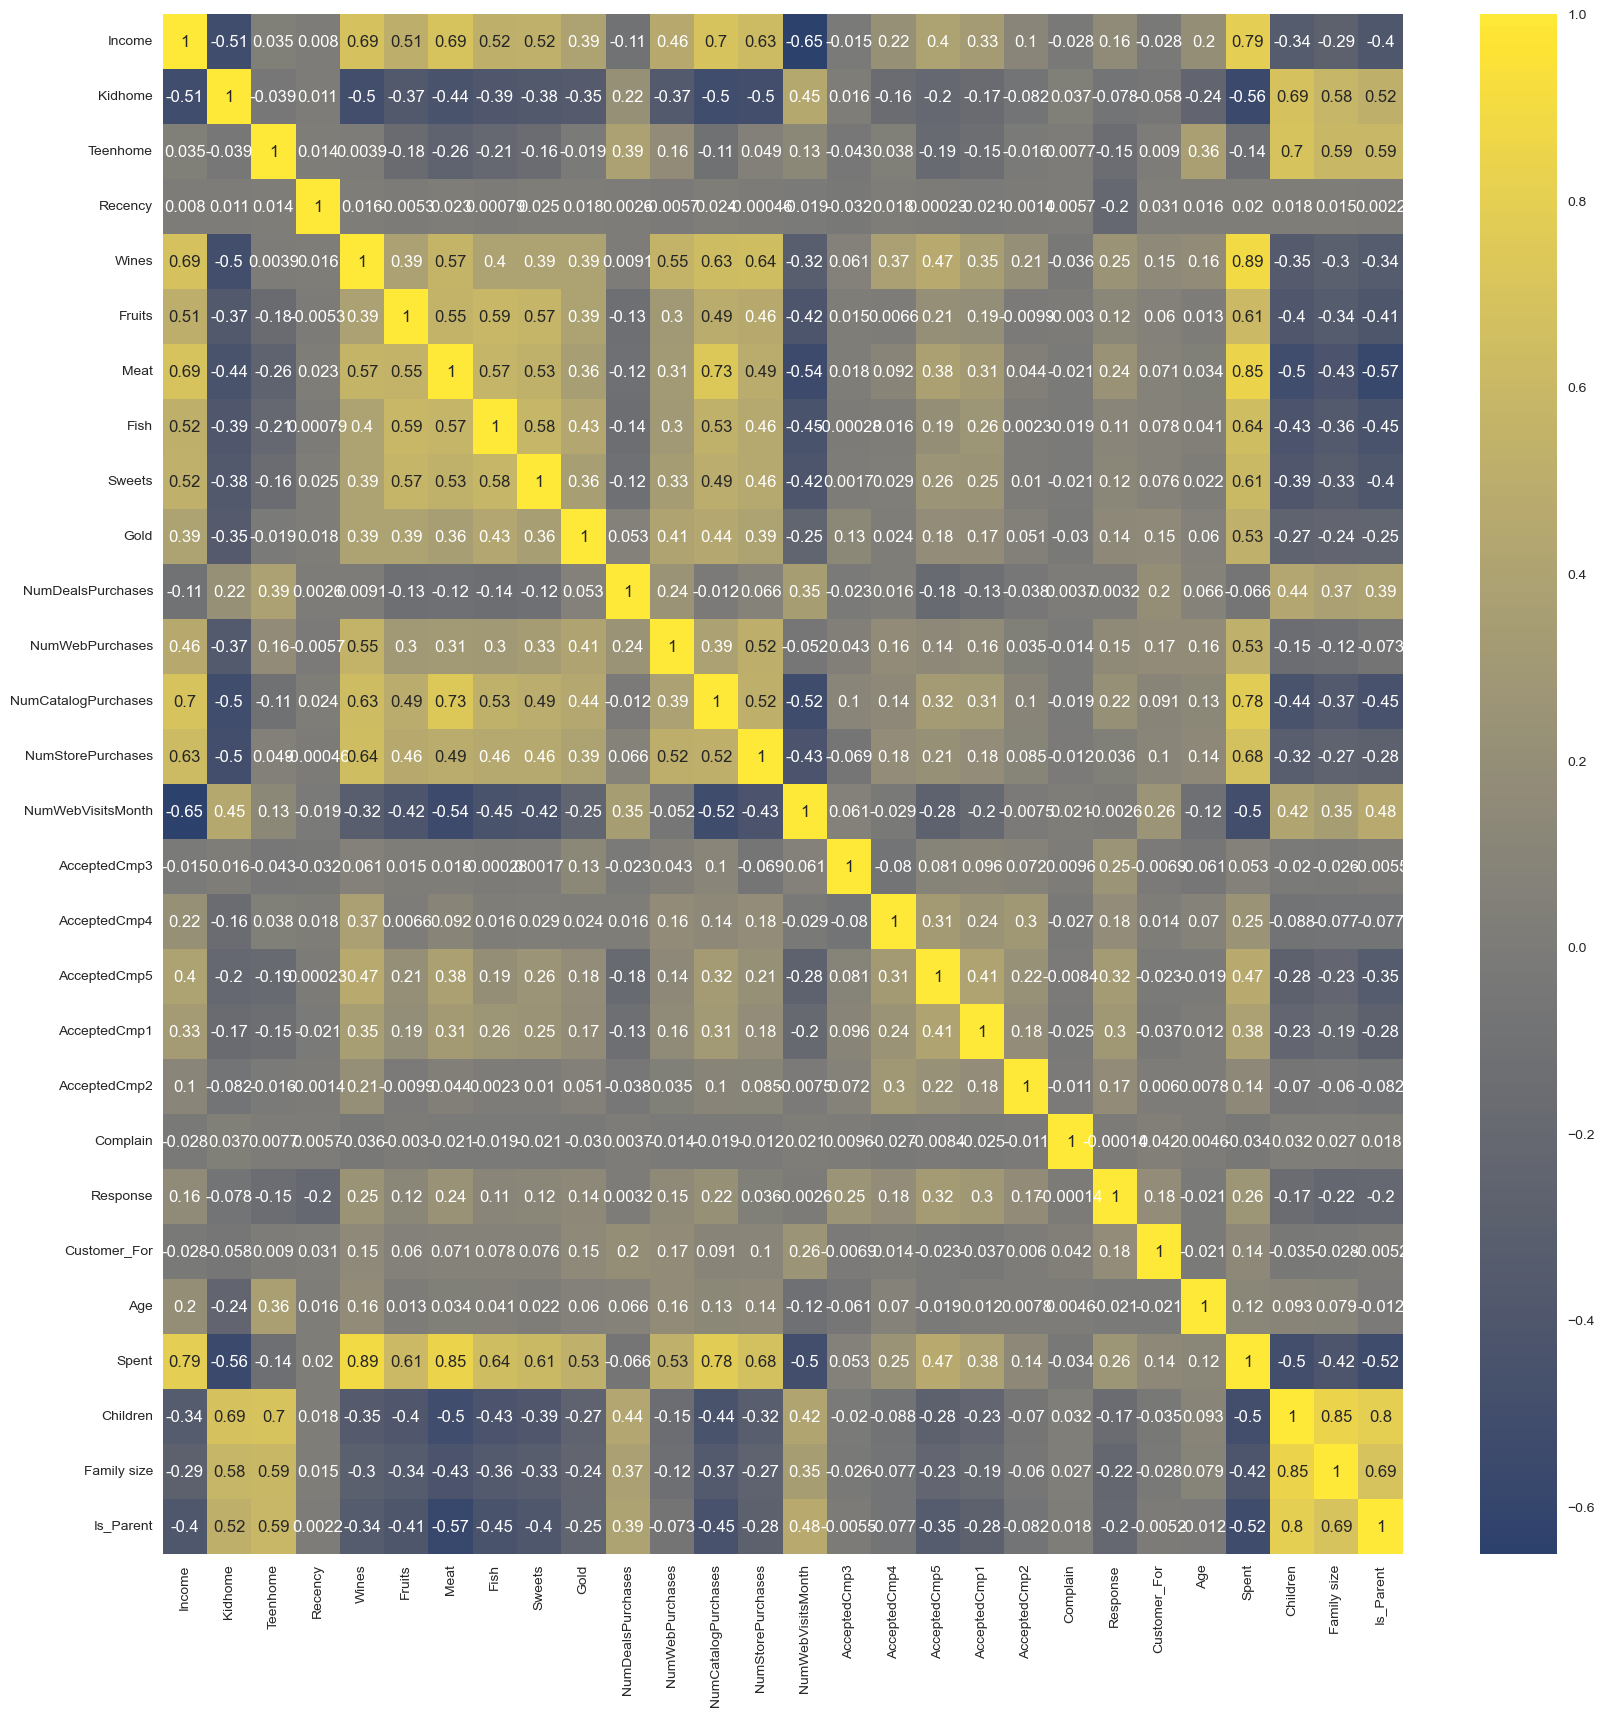

In [357]:
#correlation matrix
corr_mat=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat,annot=True,center=0,cmap='cividis')
plt.savefig('cividis.png',dpi=300,bbox_inches='tight')

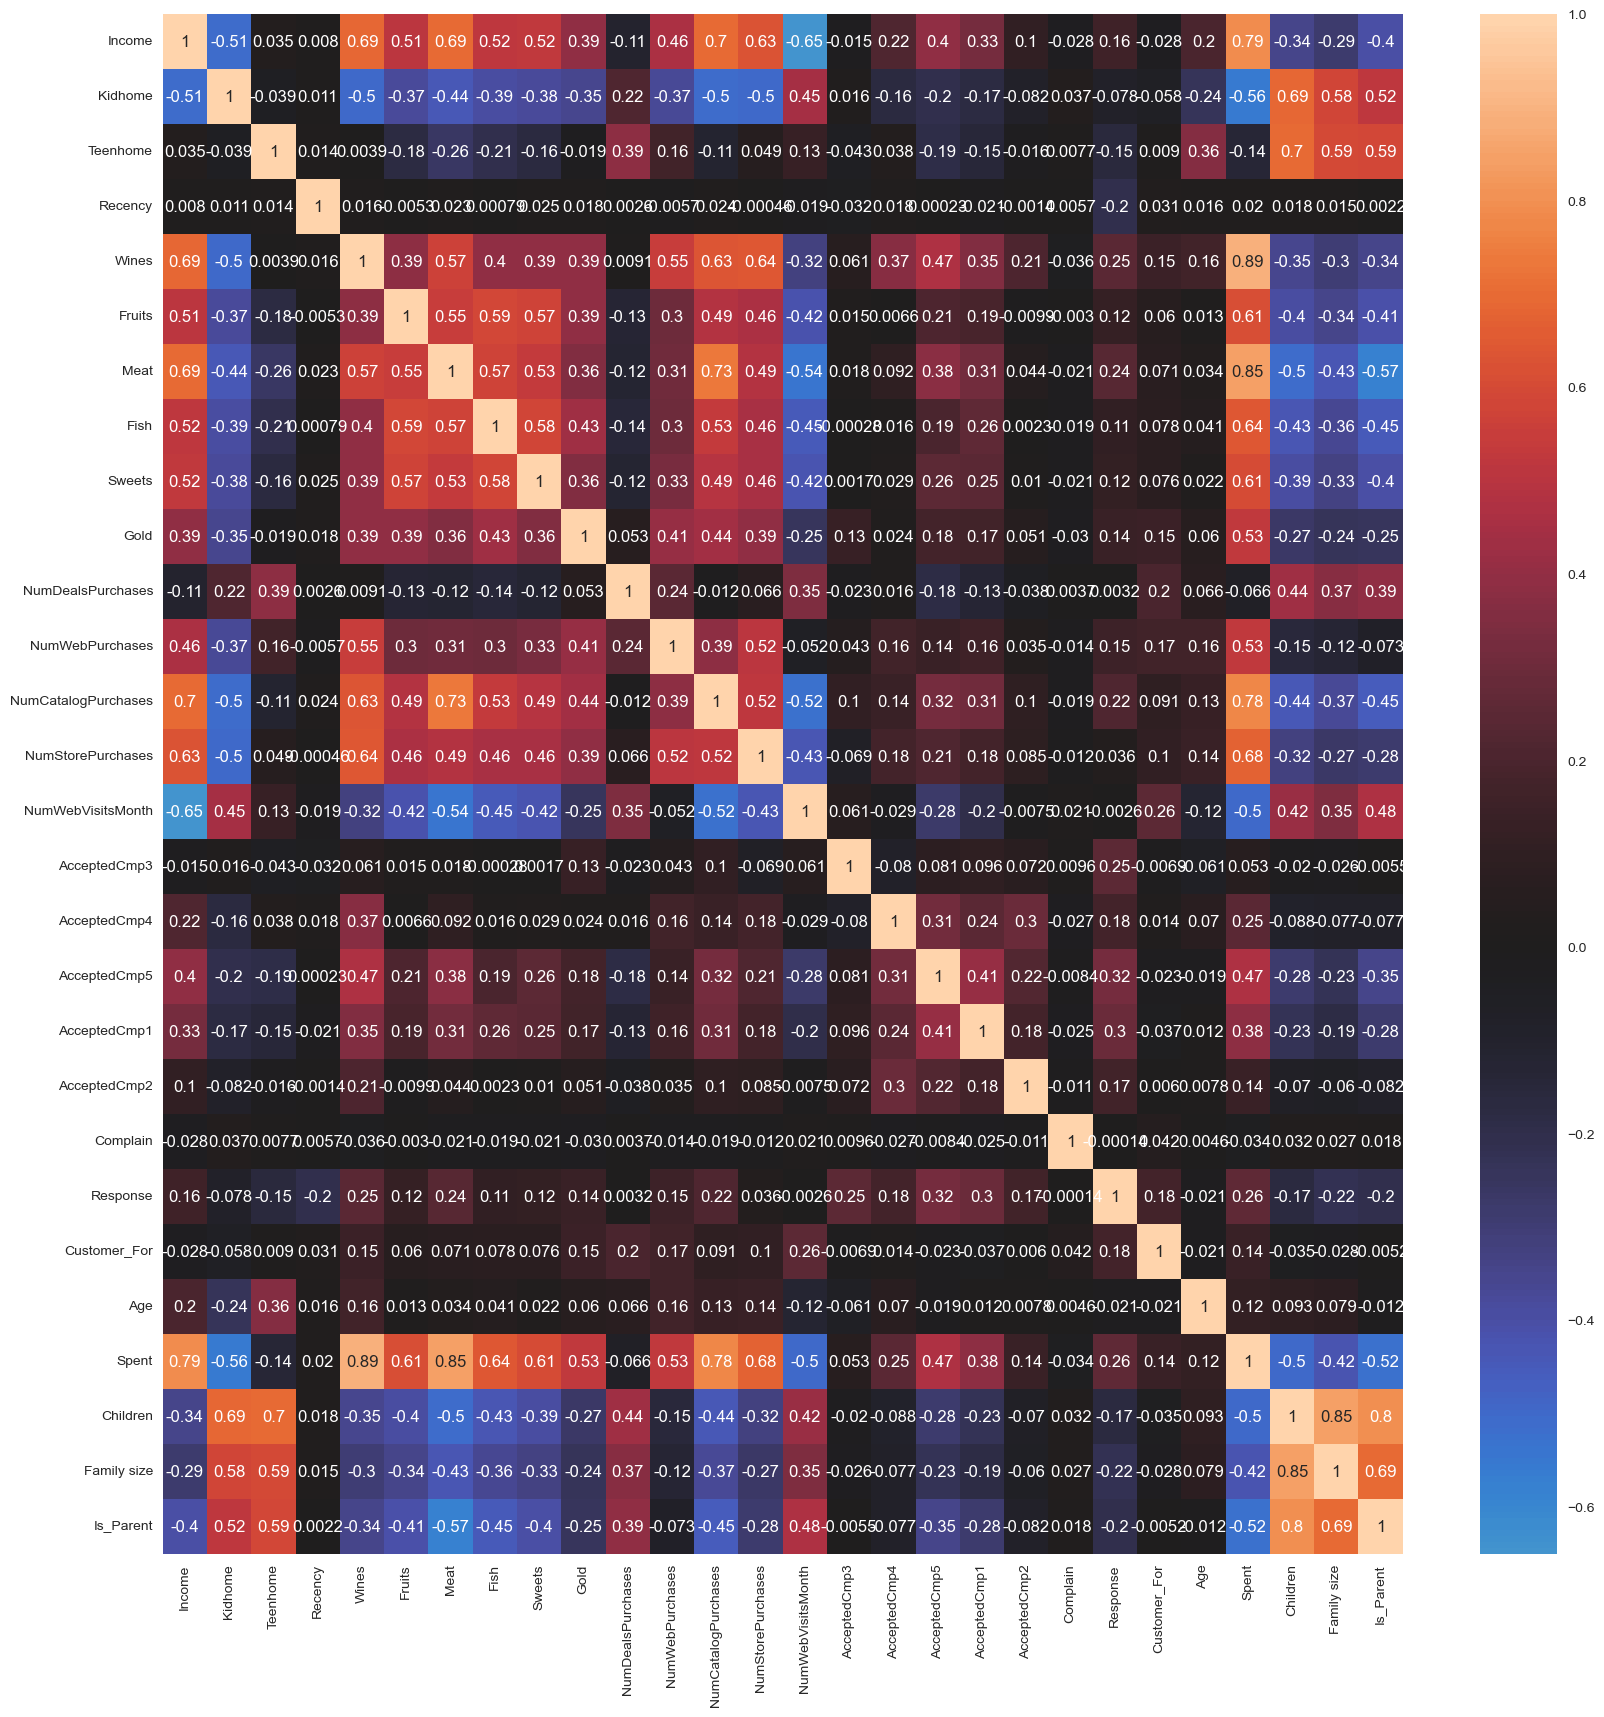

In [358]:
corr_mat=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat,annot=True,center=0)
plt.savefig('default.png',dpi=300,bbox_inches='tight')

<h2> Data PreProcessing </h2

The following steps are applied to preprocess the data:

* Label encoding the categorical features
* Scaling the features using the standard scaler
* Creating a subset dataframe for dimensionality reduction

In [359]:
s=(data.dtypes=='object')
object_cols =list(s[s].index)
print('Categorical variables in the data:',object_cols)

Categorical variables in the data: ['Education', 'Living_With']


In [360]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
print('All features are now numerical')

All features are now numerical


In [361]:
print("\n")

In [362]:
#Creating a copy of data
ds=data.copy()

# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']

ds=ds.drop(cols_del,axis=1)

#Scaling 
scaler=StandardScaler()
scaler.fit(ds)
scaled_ds=pd.DataFrame(scaler.transform(ds),columns=ds.columns)
print('All features are now scaled')

All features are now scaled


#### Scaling side note: The purpose of the StandardScaler() function in machine learning is to standardize the features by subtracting the mean and scaling to unit variance.

#### In other words, the StandardScaler() function scales the input features so that each feature has a mean of zero and a standard deviation of one. This is important because many machine learning algorithms assume that the input features are normally distributed and have a similar scale. If the features are not on the same scale, it can lead to biased or inefficient models.

#### By using the StandardScaler() function, we can transform the data to ensure that each feature has the same scale and distribution, which can improve the accuracy and performance of our machine learning models. It is commonly used as a preprocessing step before applying machine learning algorithms such as linear regression, logistic regression, and support vector machines (SVMs).

In [363]:
print("\n")

Let's take a look at our dataset after the preprocessing

In [321]:
scaled_ds.head()

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_For       Age     Spent  Living_With  Children  \
0           0.692181      1.973583  1.018352  1.676245    -1.349603 -1.264598   
1          -0.132545     -1.665144  1.274785 -0.963297    -1.349603  1.404572   
2          -0.544908     -0.172664  0.334530  0.280110     0.740959 -1.264598   
3           0.279818     -1.923210 -1.289547 -0.920135     0.740959  0.069987   
4          -0.132545     -0.822130 -1.033114 -0.307562     0.740959  0.069987   

   Family size  Is_Parent  
0    -1.758359  -1.581139  
1     0.449070   0.632456  
2    -0.654644  -1.581139  
3     0.449070   0.632456  
4     0.449070   0.632456  

[5 rows x 23 columns]

In [322]:
print("\n")

<h3> Dimensionlity Reduction </h3>

In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

Steps in this section:

* Dimensionality reduction with PCA
* Plotting the reduced dataframe

Dimensionality reduction with PCA

For this project, I will be reducing the dimensions to 3.

In [323]:
#Initiating PCA to reduce dimentions aka features to 3
pca=PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds=pd.DataFrame(pca.transform(scaled_ds),columns=['col1','col2','col3'])
PCA_ds.head().T

0         1         2         3         4
col1  4.994348 -2.884455  2.617864 -2.676036 -0.649591
col2 -0.151182 -0.006668 -0.720852 -1.541973  0.209838
col3  2.649909 -1.863748 -0.252166 -0.922611 -0.021157

In [324]:
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0 -1.056017e-16  2.878377 -5.969395 -2.538494 -0.780421  2.383290   
col2  2212.0 -6.585048e-17  1.706839 -4.312208 -1.328321 -0.158194  1.242283   
col3  2212.0  1.071576e-17  1.221956 -3.531204 -0.828981 -0.022259  0.799311   

           max  
col1  7.444305  
col2  6.142692  
col3  6.614655

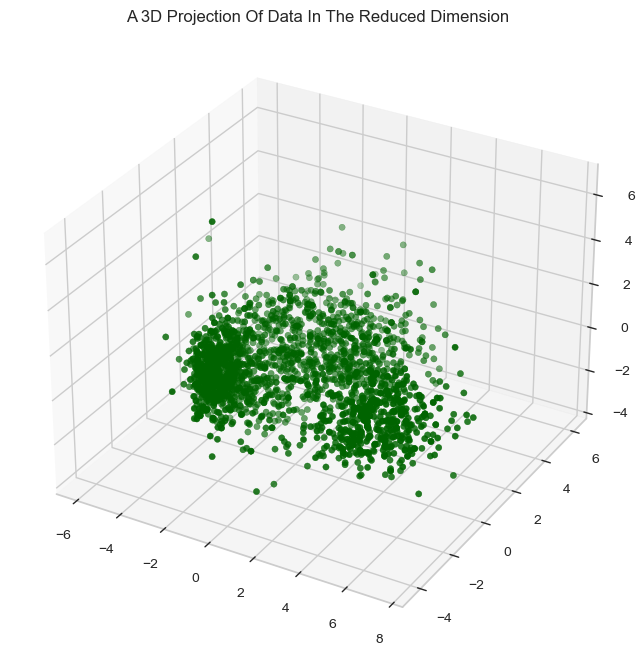

In [325]:
#A 3D Projection Of Data In The Reduced Dimension

x=PCA_ds['col1']
y=PCA_ds['col2']
z=PCA_ds['col3']


fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,marker='o',color='darkgreen')
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()


### Clustering

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

<b> Steps involved in the Clustering </b>

* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters


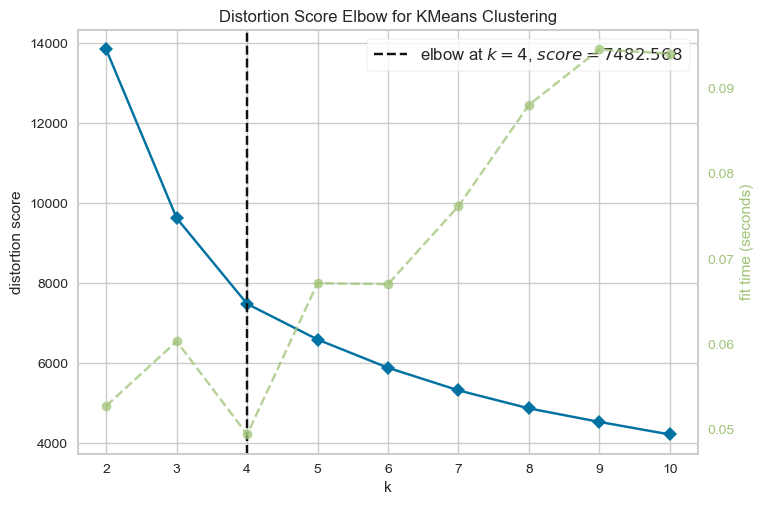

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [326]:
#I will use the Elbow method to find the number of clusers. The general rule of thumb is that the number of clusters is selected where the graphs begins to level off or form an elbow shape. The x value of that point
# represents the optimal number of clusters for the given dataset
print('Elbow Method to determine the number of clusters')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()


The above plot suggests that 4 will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [374]:
#Initiating the Agglomerative Clustering model 
AC=AgglomerativeClustering(n_clusters=4)
yhat_AC=AC.fit_predict(PCA_ds)
PCA_ds['Clusters']=yhat_AC

#Adding the Clusters feature to the original dataframe
data['Clusters']=yhat_AC

To examine the clusters formed, we can create a 3D plot of the distrubution of the clusters

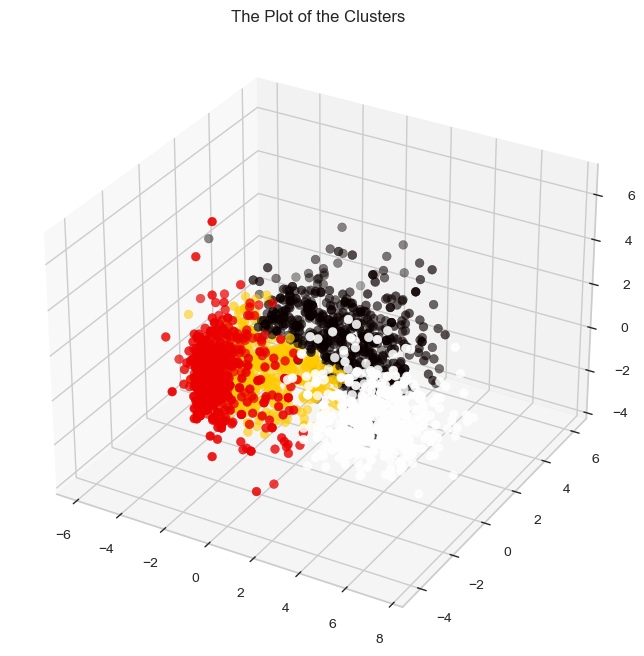

In [375]:
fig=plt.figure(figsize=(10,8))
ax=plt.subplot(111,projection='3d')
ax.scatter(x,y,z,s=40,c=PCA_ds['Clusters'],marker='o',cmap='hot')
ax.set_title('The Plot of the Clusters')
plt.show()

## Evaluating Models

Since we are working with unsupervised clustering as the variables are unknown, we are unable to evaluate or score our model. The importance of this section is to study the patterns in the clusters formed and determine the nature of the cluster's pattern. 
For this, we will look at the data in light of clusters by explorting data analysis techqniues and making conclusions.

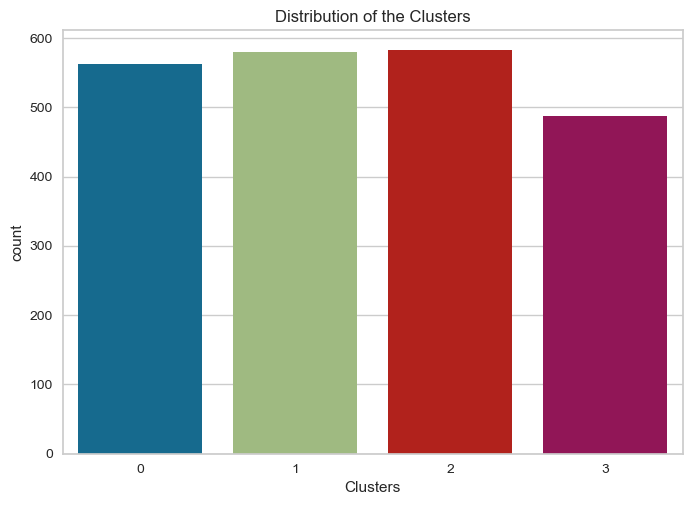

In [329]:
#plotting a countplot of clusters
plot = sns.countplot(x=data['Clusters'])
plot.set_title('Distribution of the Clusters')
plt.show()

From the countplot above, we can see that the distribution of the clusters are fairly distributed

In [330]:
print("\n")

<b>We can dig down further and see how the Money Spent and Income are related to each cluster points. We are trying to nail down how the characteristics of the clusters</b>



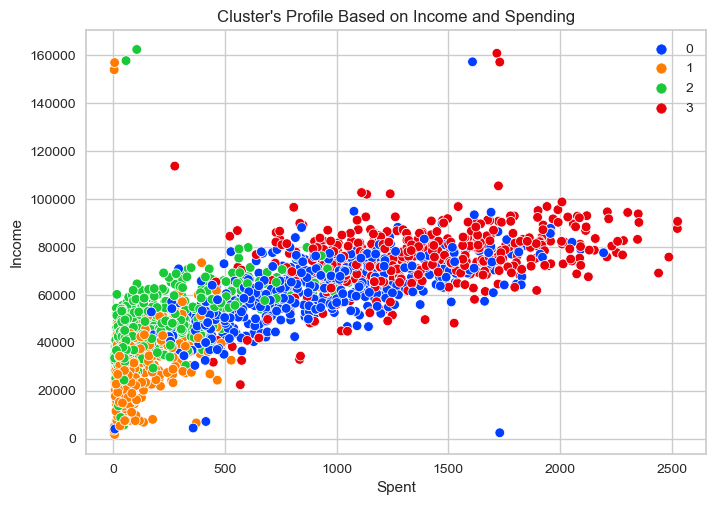

In [331]:
plot2=sns.scatterplot(data=data,x=data['Spent'],y=data['Income'],hue=data['Clusters'],palette='bright')
plot2.set_title("Cluster's Profile Based on Income and Spending")
plt.legend()
plt.show()

Analysis from this scatterplot:
* Group 0 - consists of customers that have high spending & earn average income
* Group 1 - consists of customers that spend the highest &  earn the highest income
* Group 2 - consists of customers that spend have low spending & have lower income
* Group 3 - consits of customers that spend have low spending & earn higher income than group 2

<h4> This was super interesting to see how spending & income can differentiate the clusters. I think it will be valuable to dig into the various products in the data, and see the relation of the clusters. The reason I am curious to see the distrubution is because hopefully we can differentiate the clusters based on the types of products they frequently buy or in what proportions. </h4>


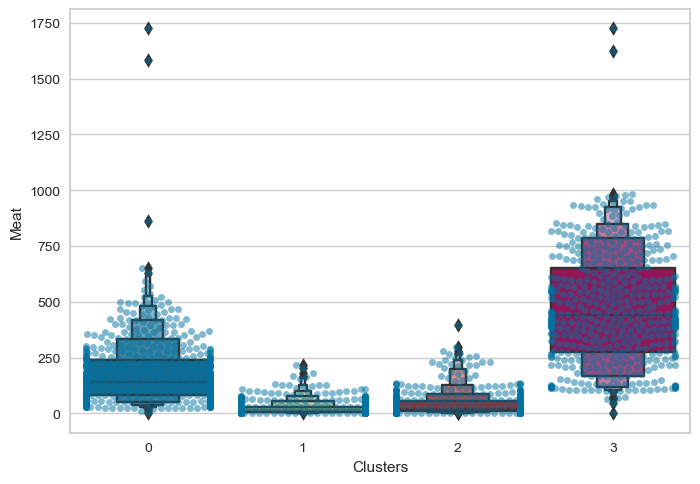

In [332]:
plt.figure()
plot3=sns.swarmplot(x=data['Clusters'],y=data['Meat'],alpha=0.5)
plot4=sns.boxenplot(x=data['Clusters'],y=data['Meat'])

From the above plot, it can be clear that Cluster 1 spend the most in the purchasing Meat products, and cluster 3 spend the least in purchasing meat.


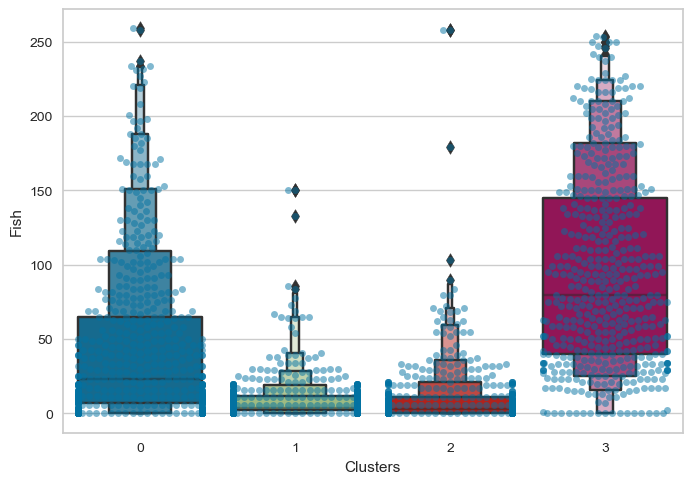

In [333]:
plt.figure()
plot3=sns.swarmplot(x=data['Clusters'],y=data['Fish'],alpha=0.5)
plot4=sns.boxenplot(x=data['Clusters'],y=data['Fish'])

From the above plot, we see that cluster 1 purchases more Fish products, but we also see that more Meat products are sold compared to Fish based on the units of the y-axis. The amount of Fish products between cluster 0 and 1 are almost similar. ALthough, we have more customers in Cluster 1

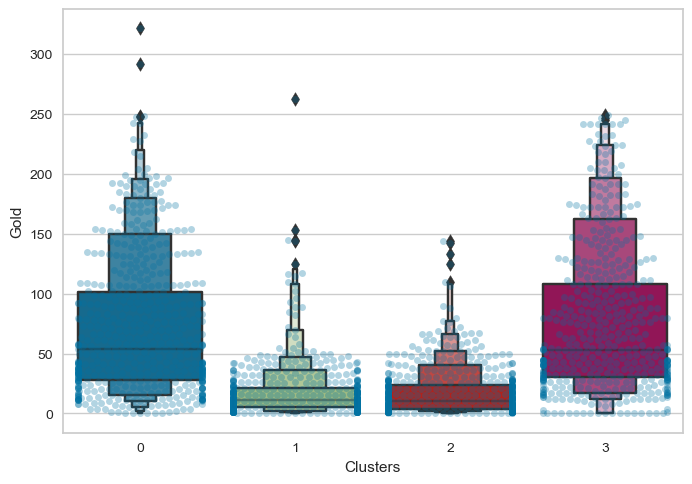

In [334]:
plt.figure()
plot3=sns.swarmplot(x=data['Clusters'],y=data['Gold'],alpha=0.3)
plot4=sns.boxenplot(x=data['Clusters'],y=data['Gold'])

This is interesting! Customers spend more money on purchasing Gold products on average compared to Fish products. We also see that the distribition between Cluster 0 and 1 is almost identical here and the distribution between Cluster 2 and 3 are similar.

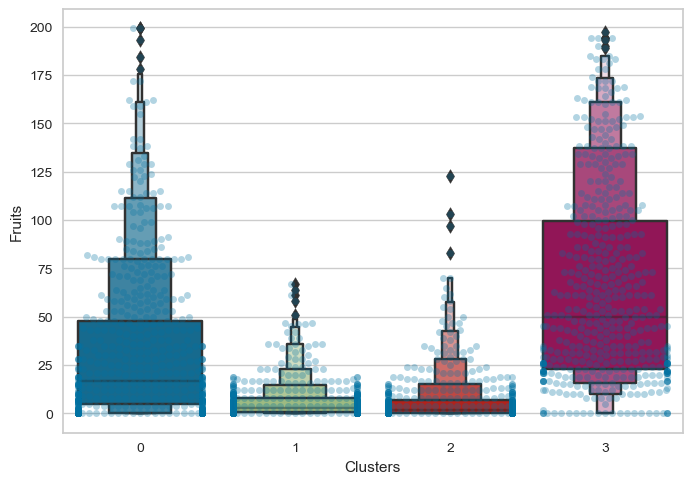

In [335]:
plt.figure()
plot3=sns.swarmplot(x=data['Clusters'],y=data['Fruits'],alpha=0.3)
plot4=sns.boxenplot(x=data['Clusters'],y=data['Fruits'])

Fruits distribition is similar to the distrubution of Fish. However, we can see that less money is spent on Fruits, and it could be because in general fruits are the chepeast products.

<b> From our 4 plots above, we can make a safe interpretation that Cluster 1 consisted of our biggest set of customers interms of size which makes them spend more, followed by Cluster 0, then Cluster 2 and Cluster 3 is the samller group which end up spending the least.

### Further Exploration


let's explore how the campaigns did in the past

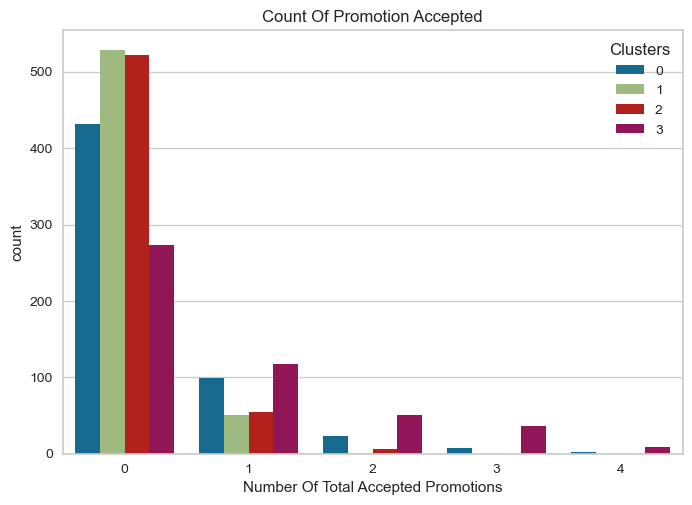

In [336]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

Exploring the above countplot, we can clearly see that the Promotion acceptance is not as efficient as planned. Only a small number of customers from the clusters are utilizing it. We can see that the cluster group that earns the least is making taking advantage of the promotions compared to cluster 2 which earns the highest is not utlizing the promotions campagins. Although, we concluded that promotion acceptance hasn't been succesful, we can atleast conclude that cluster 3 takes the most advantage of the promotion at the moment. 

In future research, we can look into difference medium on how to target more customer.


In [364]:
print("\n")

<h3> Distributing the clusters based on family and living

<Figure size 800x550 with 0 Axes>

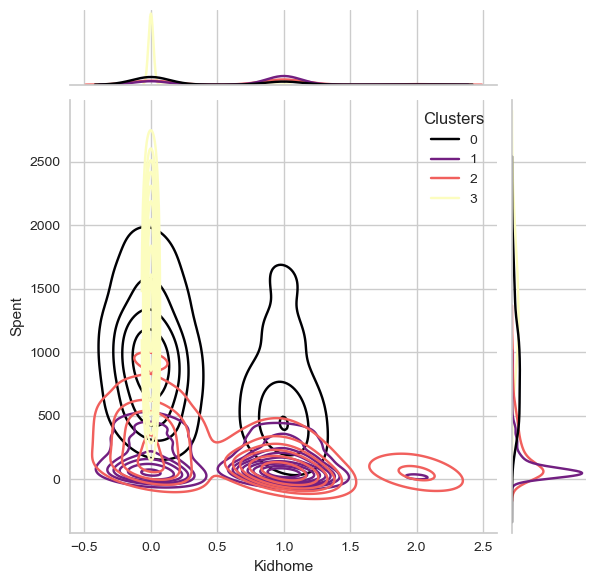

In [408]:
#Creating a list of variables to plot against
#Personal = ['Kidhome','Teenhome','Customer_For','Age','Children','Family size','Is_Parent','Education','Living_With']
#for i in Personal:
plt.figure()
plot6=sns.jointplot(x=data['Kidhome'],y=data['Spent'],hue=data["Clusters"],kind='kde',palette='magma')
plt.show()

<Figure size 800x550 with 0 Axes>

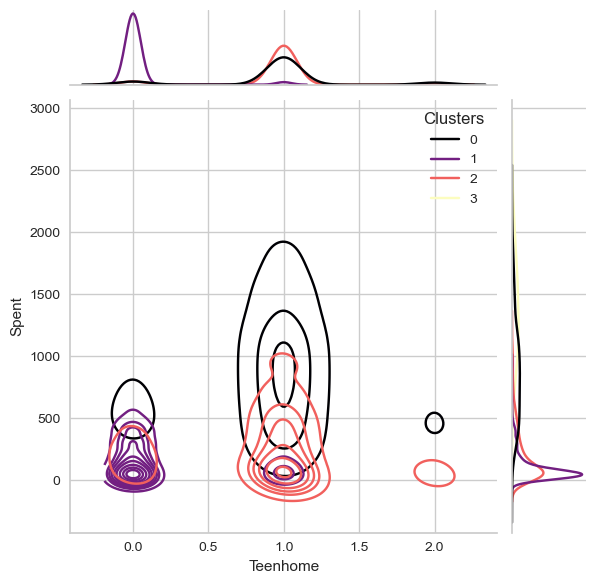

In [409]:
plt.figure()
plot7=sns.jointplot(x=data['Teenhome'],y=data['Spent'],hue=data["Clusters"],kind='kde',palette='magma')
plt.show()

<Figure size 800x550 with 0 Axes>

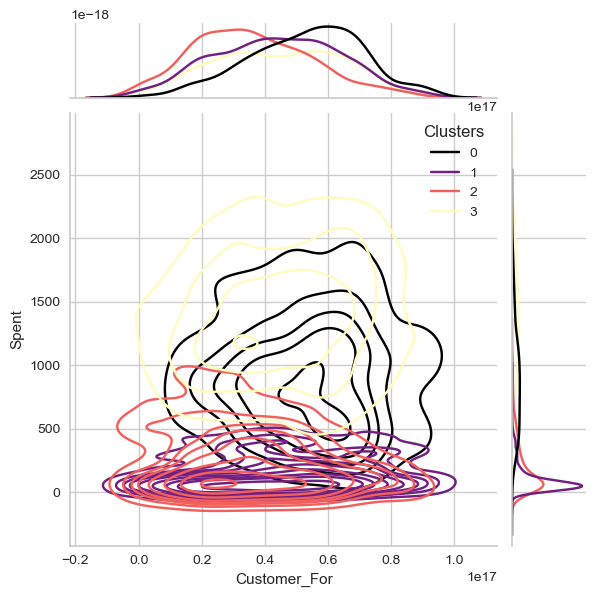

In [410]:
plt.figure()
plot7=sns.jointplot(x=data['Customer_For'],y=data['Spent'],hue=data["Clusters"],kind='kde',palette='magma')
plt.show()

<Figure size 800x550 with 0 Axes>

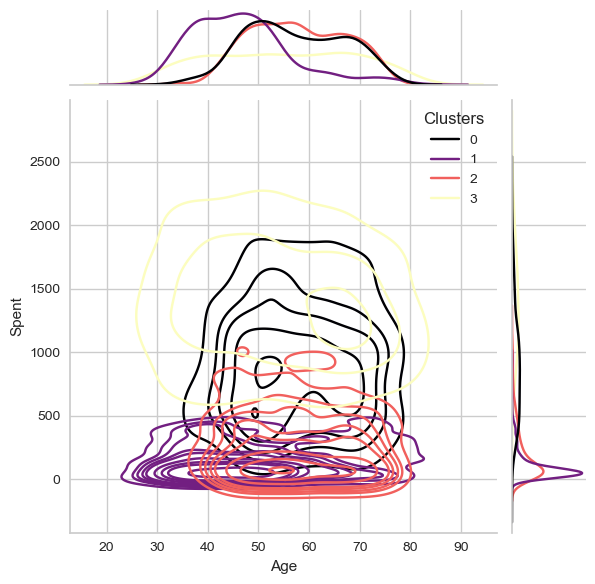

In [420]:
plt.figure()
plot8=sns.jointplot(x=data['Age'],y=data['Spent'],hue=data["Clusters"],kind='kde',palette='magma')
plt.show()
plot8.savefig('age.png')

<Figure size 800x550 with 0 Axes>

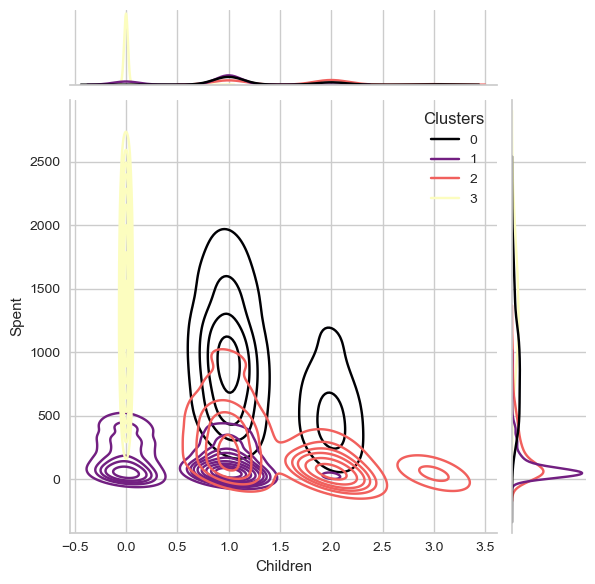

In [412]:
plt.figure()
plot9=sns.jointplot(x=data['Children'],y=data['Spent'],hue=data["Clusters"],kind='kde',palette='magma')
plt.show()

<Figure size 800x550 with 0 Axes>

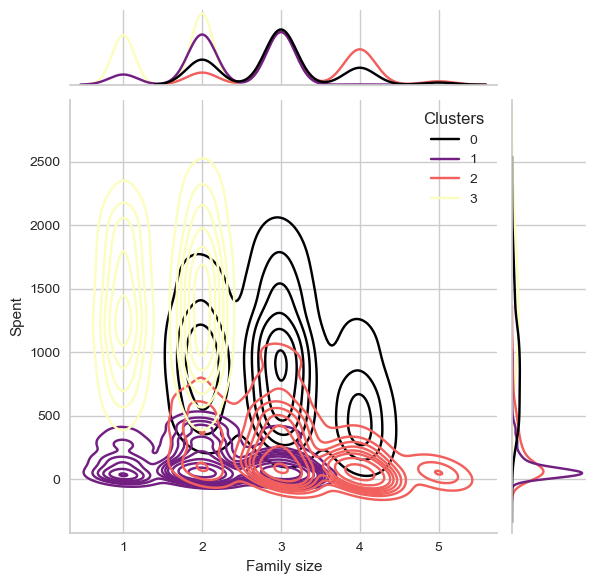

In [413]:
plt.figure()
plot10=sns.jointplot(x=data['Family size'],y=data['Spent'],hue=data["Clusters"],kind='kde',palette='magma')
plt.show()

<Figure size 800x550 with 0 Axes>

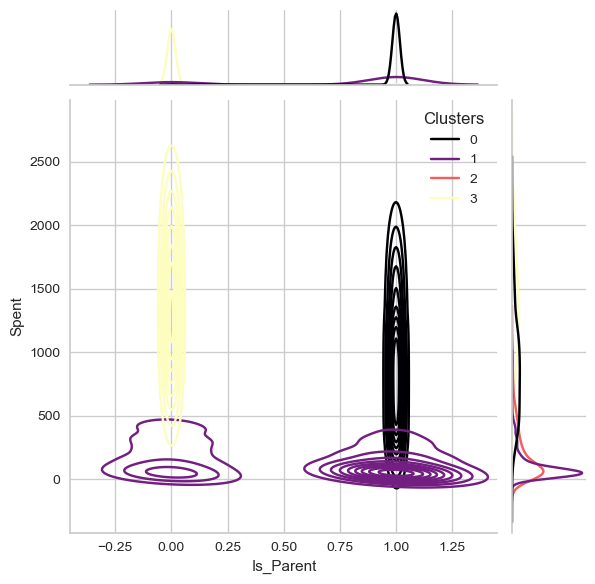

In [414]:
plt.figure()
plot10=sns.jointplot(x=data['Is_Parent'],y=data['Spent'],hue=data["Clusters"],kind='kde',palette='magma')
plt.show()

<Figure size 800x550 with 0 Axes>

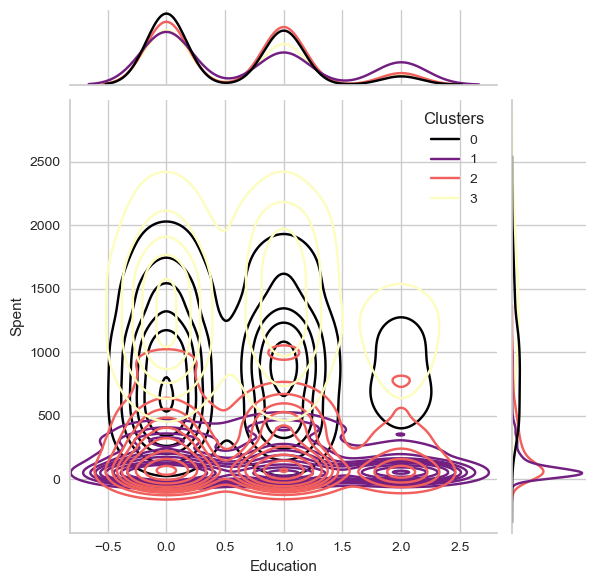

In [421]:
plt.figure()
plot11=sns.jointplot(x=data['Education'],y=data['Spent'],hue=data["Clusters"],kind='kde',palette='magma')
plt.show()
plot11.savefig('education.png')

<Figure size 800x550 with 0 Axes>

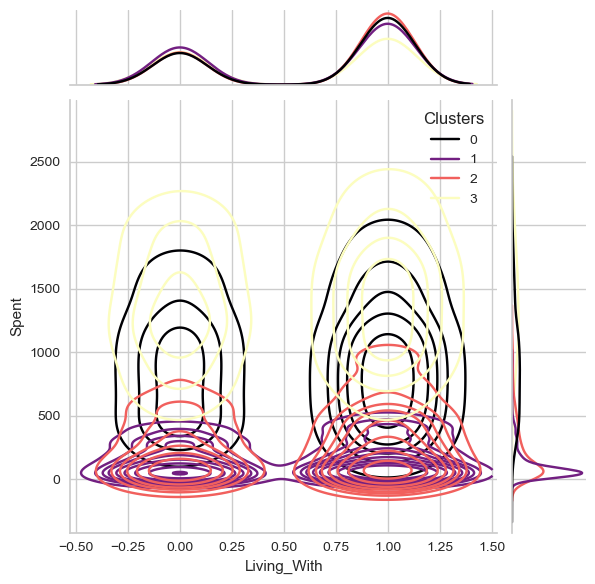

In [424]:

plt.figure()
plot12=sns.jointplot(x=data['Living_With'],y=data['Spent'],hue=data["Clusters"],kind='kde',palette='magma')
plt.show()
plot12.savefig('patner.png')

<Figure size 800x550 with 0 Axes>

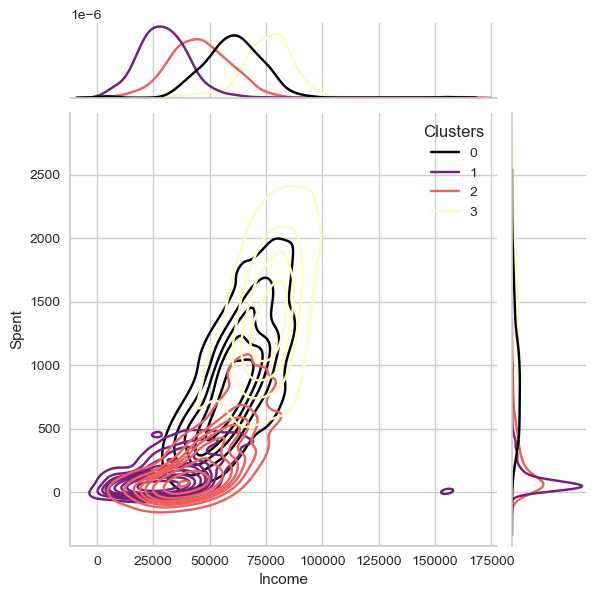

In [423]:

plt.figure()
plot13=sns.jointplot(x=data['Income'],y=data['Spent'],hue=data["Clusters"],kind='kde',palette='magma')
plt.show()
plot13.savefig('income.png')

|Characteristics/Cluster  |  0    |  1     | 2    | 3   |
| ------------ | ------------ | ------------ | ------------ |-----------|
| Parent   |  Yes   | Some Yes & Some No   |  Yes    |  No  |
| Age Group |  Average 50-60| Average 30-50 |  Average 50-70   | Average 30-70|
|  Education Level |  Average 0.5  | A widespread but had a lot of higher education  | Mid level    |  Mid-Level |
| Income   | Mid   |  Low   |  Lower Mid   |  Higher  |
| Patner  | Moslty couples   | Mostly couples  |  Mix of both   | Mostly couples  |
|Spend  | Medium to High   | Low  |  Medium   | High |


<h2>Discussion

In this project, I performed unsupervised clustering, using dimensionality reduction followed by agglomerative clustering. I came up with 4 clusters and used them to profile customers based on their family structures, income, and spending, which can be used to plan better marketing strategies.

We were able to distinguish some of the clusters quite easily by comparing several characteristics, but we couldn't use just one metric to easily distinguish them. Therefore, it was essential to run a few plots that helped to narrow down the groups.

The table at the end helped to identify the key differences between the clusters. The results suggested that Cluster 3 consisted of customers from a widespread age group, with mid-level education, and the highest earnings and spending. This group had partners but no children.

Cluster 1 was another distinct group. This group had a mix of parents and non-parents, and most of them had partners. They earned the least and spent the least. Their education level ranged from no education to high-level education.

Cluster 0 and 2 had some differences but also some similarities. Both clusters were in the same age group, although Cluster 2 had slightly older customers. Both groups were parents and had average income, although Group 0 spent slightly more than Group 2. Group 0 had mostly kids at home, while Group 2 had more teenagers living at home.

